In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

hydrophobicities = np.load('ligand_pocket_size.npy')

In [3]:
hydrophobicities.min()

3879

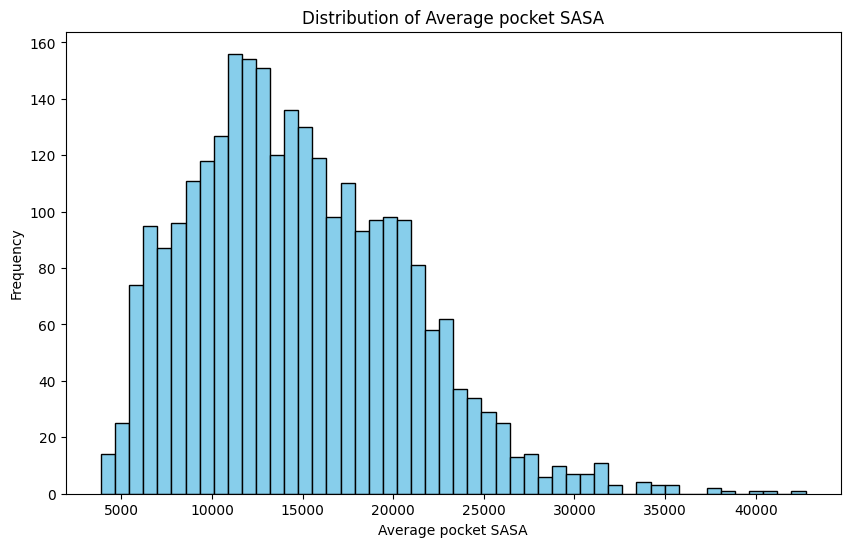

11264.68


In [4]:
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(hydrophobicities, bins=50, color='skyblue', edgecolor='black')
peak_index = np.argmax(counts)
peak_x = (bins[peak_index] + bins[peak_index + 1]) / 2
plt.title('Distribution of Average pocket SASA')
plt.xlabel('Average pocket SASA')
plt.ylabel('Frequency')
plt.show()
print(peak_x)

In [5]:
counts, bins

(array([ 14.,  25.,  74.,  95.,  87.,  96., 111., 118., 127., 156., 154.,
        151., 120., 136., 130., 119.,  98., 110.,  93.,  97.,  98.,  97.,
         81.,  58.,  62.,  37.,  34.,  29.,  25.,  13.,  14.,   6.,  10.,
          7.,   7.,  11.,   3.,   0.,   4.,   3.,   3.,   0.,   0.,   2.,
          1.,   0.,   1.,   1.,   0.,   1.]),
 array([ 3879.  ,  4656.44,  5433.88,  6211.32,  6988.76,  7766.2 ,
         8543.64,  9321.08, 10098.52, 10875.96, 11653.4 , 12430.84,
        13208.28, 13985.72, 14763.16, 15540.6 , 16318.04, 17095.48,
        17872.92, 18650.36, 19427.8 , 20205.24, 20982.68, 21760.12,
        22537.56, 23315.  , 24092.44, 24869.88, 25647.32, 26424.76,
        27202.2 , 27979.64, 28757.08, 29534.52, 30311.96, 31089.4 ,
        31866.84, 32644.28, 33421.72, 34199.16, 34976.6 , 35754.04,
        36531.48, 37308.92, 38086.36, 38863.8 , 39641.24, 40418.68,
        41196.12, 41973.56, 42751.  ]))

In [6]:
from lib.pdb import get_all_pdb_names

In [7]:
protein_names = get_all_pdb_names()

In [8]:
# ligand_pocket_size_no0 = hydrophobicities[hydrophobicities!=0]

In [9]:
protein_names[np.argmin(hydrophobicities)],protein_names[np.argmax(hydrophobicities)]

('3ip5', '4lvt')

In [11]:
hydrophobic = []
hydrophilic = []
neutral = []

for pdb_name, hydrophobicity in zip(protein_names, hydrophobicities):
    if hydrophobicity > 5433.88:
        hydrophobic.append(pdb_name)
    else:
        hydrophilic.append(pdb_name)

In [14]:
hydrophilic

['185l',
 '187l',
 '1a99',
 '1xff',
 '1lgw',
 '1li2',
 '1li3',
 '1li6',
 '1sw2',
 '2rcb',
 '2reg',
 '3o7u',
 '2b4l',
 '1j16',
 '3ip5',
 '3ip6',
 '3ip9',
 '4euo',
 '3ppp',
 '3ppq',
 '5ave',
 '5avf',
 '2bza',
 '3umq',
 '4ykj',
 '1y20',
 '1r9l',
 '4w52',
 '3p7i',
 '1l83',
 '2hzl',
 '1d7j',
 '3r6u',
 '1u1w',
 '1j14',
 '1xt8',
 '1ai7',
 '4b5s',
 '3ttm']

In [15]:
len(hydrophilic) ,len(hydrophobic), len(neutral)

(39, 2680, 0)

In [6]:
with open('../../../data/pdb_group/ave_SASA_large_9_pdb', mode='w') as f:
    for pdb in hydrophobic:
        f.write(pdb + '\n')

In [16]:
with open('../../../data/pdb_group/ligand_pocket_enclosed_pdb', mode='w') as f:
    for pdb in hydrophilic:
        f.write(pdb + '\n')

In [93]:
with open('../../data/neutral_500_pdb', mode='w') as f:
    for pdb in neutral:
        f.write(pdb + '\n')

In [8]:
with open('../../../data/train_list', mode='r') as f:
    train_pdb_list = f.read().splitlines()
with open('../../../data/val_list', mode='r') as f:
    val_pdb_list = f.read().splitlines()
train_pdb_set = set(train_pdb_list)
val_pdb_set = set(val_pdb_list)

In [17]:
with open('../../../data/test_list', mode='r') as f:
    test_pdb_list = f.read().splitlines()
test_pdb_set = set(test_pdb_list)


In [18]:
hydrophobic_set = set(hydrophobic)
hydrophilic_set = set(hydrophilic)
# neutral_set = set(neutral)

In [10]:
test_hydrophobic = list(((train_pdb_set | val_pdb_set) & hydrophobic_set))
test_hydrophilic = list(((train_pdb_set | val_pdb_set) & hydrophilic_set))
# test_neutral = list(((train_pdb_set | val_pdb_set) & neutral_set))

In [19]:
test_hydrophobic = list((test_pdb_set & hydrophobic_set))
test_hydrophilic = list((test_pdb_set & hydrophilic_set))

In [11]:
with open('../../../data/test_ave_SASA_large_9_pdb', mode='w') as f:
    for pdb in test_hydrophobic:
        f.write(pdb + '\n')

In [20]:
with open('../../../data/test_ligand_pocket_enclosed_pdb', mode='w') as f:
    for pdb in test_hydrophilic:
        f.write(pdb + '\n')

In [98]:
with open('../../data/test_neutral_500_pdb', mode='w') as f:
    for pdb in test_neutral:
        f.write(pdb + '\n')